#  The Reuters dataset 

 a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set

# Loading the Reuters dataset

In [32]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

# Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?')
                             for i in train_data[0]])


557056/550378 [==============================] - 3s 5us/step


In [33]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [35]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [6]:
train_labels[10]

3

# Encoding the data

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1. 
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [8]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
def to_one_hot(labels, dimension=46): 
    results = np.zeros((len(labels), dimension)) 
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [11]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)


# Model definition

In [36]:
from keras import models 
from keras import layers
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))


# Compiling the model

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


# Setting aside a validation set

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]


# Training the model

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 640us/step - loss: 3.8118 - acc: 0.0680 - val_loss: 3.7977 - val_acc: 0.0590
Epoch 2/20
7982/7982 [==============================] - 3s 326us/step - loss: 3.7880 - acc: 0.1054 - val_loss: 3.7768 - val_acc: 0.2230
Epoch 3/20
7982/7982 [==============================] - 3s 330us/step - loss: 3.7675 - acc: 0.2164 - val_loss: 3.7569 - val_acc: 0.2230
Epoch 4/20
7982/7982 [==============================] - 3s 347us/step - loss: 3.7476 - acc: 0.2164 - val_loss: 3.7371 - val_acc: 0.2230
Epoch 5/20
7982/7982 [==============================] - 3s 338us/step - loss: 3.7279 - acc: 0.2313 - val_loss: 3.7176 - val_acc: 0.2230
Epoch 6/20
7982/7982 [==============================] - 3s 336us/step - loss: 3.7084 - acc: 0.2245 - val_loss: 3.6981 - val_acc: 0.3540
Epoch 7/20
7982/7982 [==============================] - 3s 331us/step - loss: 3.6889 - a

#  Plotting the training and validation loss

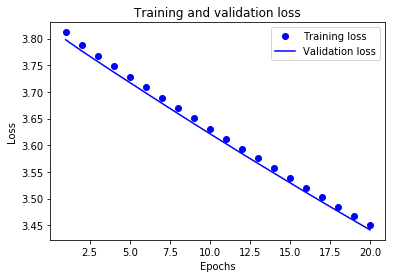

In [37]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

# Plotting the training and validation accuracy

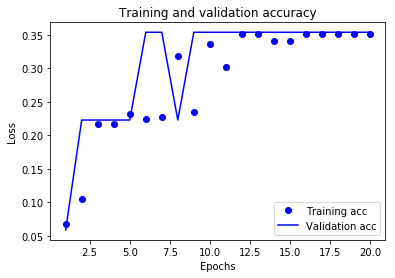

In [18]:
plt.clf()
acc = history.history['acc'] 
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()


# Retraining a model from scratch

In [20]:
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val)) 
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 482us/step - loss: 3.8119 - acc: 0.2098 - val_loss: 3.7979 - val_acc: 0.3530
Epoch 2/9
7982/7982 [==============================] - 3s 346us/step - loss: 3.7881 - acc: 0.3514 - val_loss: 3.7769 - val_acc: 0.3530
Epoch 3/9
7982/7982 [==============================] - 3s 344us/step - loss: 3.7676 - acc: 0.3514 - val_loss: 3.7570 - val_acc: 0.3530
Epoch 4/9
7982/7982 [==============================] - 3s 340us/step - loss: 3.7477 - acc: 0.3514 - val_loss: 3.7373 - val_acc: 0.3530
Epoch 5/9
7982/7982 [==============================] - 3s 344us/step - loss: 3.7280 - acc: 0.3514 - val_loss: 3.7177 - val_acc: 0.3530
Epoch 6/9
7982/7982 [==============================] - 3s 339us/step - loss: 3.7085 - acc: 0.3514 - val_loss: 3.6983 - val_acc: 0.3530
Epoch 7/9
7982/7982 [==============================] - 3s 353us/step - loss: 3.6891 - acc: 0.3514 - val_loss: 3.6790 - val_acc: 0.3530
Epoch 8

In [21]:
results

[3.6431239893260217, 0.36197684778237277]

# A different way to handle the labels and the loss 

In [22]:
import copy 
test_labels_copy = copy.copy(test_labels) 
np.random.shuffle(test_labels_copy) 
hits_array = np.array(test_labels) == np.array(test_labels_copy)  
float(np.sum(hits_array)) / len(test_labels) 

0.182546749777382

In [23]:
y_train = np.array(train_labels) 
y_test = np.array(test_labels)


In [24]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 583us/step - loss: 3.7812 - acc: 0.1550 - val_loss: 3.7413 - val_acc: 0.3530
Epoch 2/20
7982/7982 [==============================] - 3s 416us/step - loss: 3.7055 - acc: 0.3242 - val_loss: 3.6679 - val_acc: 0.3530
Epoch 3/20
7982/7982 [==============================] - 3s 428us/step - loss: 3.6325 - acc: 0.3482 - val_loss: 3.5961 - val_acc: 0.3540
Epoch 4/20
7982/7982 [==============================] - 3s 425us/step - loss: 3.5619 - acc: 0.3514 - val_loss: 3.5265 - val_acc: 0.3540
Epoch 5/20
7982/7982 [==============================] - 3s 426us/step - loss: 3.4935 - acc: 0.3514 - val_loss: 3.4591 - val_acc: 0.3540
Epoch 6/20
7982/7982 [==============================] - 3s 427us/step - loss: 3.4276 - acc: 0.3514 - val_loss: 3.3941 - val_acc: 0.3540
Epoch 7/20
7982/7982 [==============================] - 4s 445us/step - loss: 3.3633 - acc: 0.3514 - val_loss: 3.3309 - val_acc: 0.3540


In [27]:
results

[3.6431239893260217, 0.36197684778237277]

# Generating predictions for new data

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions[0].shape

(46,)

In [30]:
np.sum(predictions[0])

1.0000001

In [31]:
np.argmax(predictions[0])

3